In [1]:
import numpy as np

In [2]:
def EGreedy(e,start,optimum,Nt,Bandits,ConstantStep=False,alpha=None):
    p1 = np.random.rand()
    reward = 0
    index = -1
    if(p1<(1-e)):
#         print(Nt)
        maxVal = -100
        index = -1
        for i in range(Bandits):
            temp = start[i]
            if(temp>maxVal):
                maxVal = temp
                index = i
        reward = optimum[index]+np.random.randn(2)[0]
        if(ConstantStep==False):
            start[index] = (start[index]*Nt[index]+reward)/(Nt[index]+1)
        else:
            start[index] = (1-alpha)*start[index]+alpha*reward
#             print(alpha)
        Nt[index]+=1
    else:
        index = np.random.randint(Bandits)
#         print(index)
        reward = optimum[index]+np.random.randn(2)[0]
        if(ConstantStep==False):
            start[index] = (start[index]*Nt[index]+reward)/(Nt[index]+1)
        else:
            start[index] = (1-alpha)*start[index]+alpha*reward
        Nt[index]+=1
    
    return start,Nt,reward,index

In [4]:
def BestAction(Optimum):
    index = -1
    maxV = -100
    for i in range(len(Optimum)):
        temp = Optimum[i]
        if(temp>maxV):
            maxV = temp
            index = i
    return index

In [24]:
np.random.seed(0)
Bandits = 10
e=0.1
alpha = 0.1
NumbStep = 5000
E_Reward = np.zeros(NumbStep+1)
Alpha_Reward = np.zeros(NumbStep+1)
E_Avg= np.zeros(NumbStep+1)
Alpha_Avg = np.zeros(NumbStep+1)
1001
for j in range(2000):
    Optimum = np.zeros(Bandits)
#     print(Optimum[1])
    EqualStart = np.random.randn(2)[0]
    for i in range(Bandits):
        Optimum[i] = EqualStart
    start2 = np.random.randn(Bandits)*0.0001
    start3 = np.random.randn(Bandits)*0.0001
    Nt2 = np.zeros(Bandits)
    Nt3 = np.zeros(Bandits)
    Time = 0
    BestAct=0
    for i in range(NumbStep):
        Time+=1
        start2,Nt2,CurrReward,ind = EGreedy(e,start2,Optimum,Nt2,Bandits)
        E_Avg[Time]+=CurrReward
        if(ind==BestAct):
            E_Reward[Time] += 1
        
        start3,Nt3,CurrReward,ind = EGreedy(e,start3,Optimum,Nt3,Bandits,ConstantStep=True,alpha=alpha)
        Alpha_Avg[Time]+=CurrReward
        if(ind==BestAct):
            Alpha_Reward[Time] += 1
        Optimum += np.random.randn(Bandits)*0.01
        BestAct = BestAction(Optimum)
        
E_Reward/=2000

Alpha_Reward/=2000
Alpha_Reward


array([0.    , 0.104 , 0.099 , ..., 0.7015, 0.7115, 0.7155])

In [25]:
E_Reward

array([0.    , 0.109 , 0.095 , ..., 0.4305, 0.437 , 0.434 ])

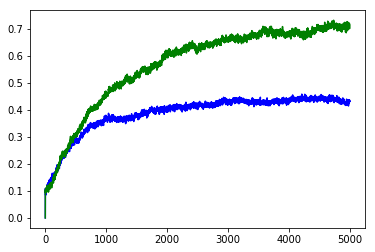

In [26]:
from matplotlib import pyplot as plt
arr = range(0,NumbStep+1)
plt.plot(arr,E_Reward,color='Blue')
plt.plot(arr,Alpha_Reward,color='Green')
plt.show()


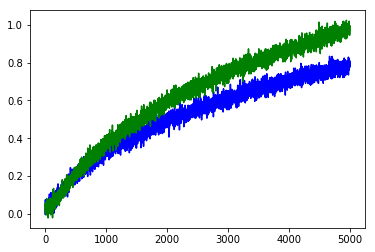

In [27]:
from matplotlib import pyplot as plt
E_Avg/=2000
Alpha_Avg/=2000
arr = range(0,NumbStep+1)
plt.plot(arr,E_Avg,color='Blue')
plt.plot(arr,Alpha_Avg,color='Green')
plt.show()